In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
police=pd.read_csv('/Users/mac/Desktop/DataScience/datsets/police_dataset.csv')
police.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [3]:
police.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [4]:
police.shape

(65535, 15)

In [5]:
police.drop(columns=['country_name'],axis=1,inplace=True)

In [6]:
police.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [7]:
police.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [8]:
police['search_type'].unique()

array([nan, 'Incident to Arrest,Protective Frisk', 'Probable Cause',
       'Incident to Arrest', 'Probable Cause,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Probable Cause',
       'Incident to Arrest,Inventory',
       'Incident to Arrest,Probable Cause', 'Protective Frisk',
       'Reasonable Suspicion', 'Inventory', 'Inventory,Protective Frisk',
       'Incident to Arrest,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Protective Frisk',
       'Probable Cause,Protective Frisk',
       'Incident to Arrest,Inventory,Protective Frisk',
       'Protective Frisk,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Reasonable Suspicion',
       'Inventory,Probable Cause',
       'Incident to Arrest,Protective Frisk,Reasonable Suspicion',
       'Inventory,Probable Cause,Protective Frisk',
       'Inventory,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Reasonable Suspicion',
       'Inventory,Probable Cause,Reasonable Suspicion']

# For speeding men or women who were most often?

In [9]:
speeding=police[police['violation']=='Speeding'].driver_gender.value_counts()

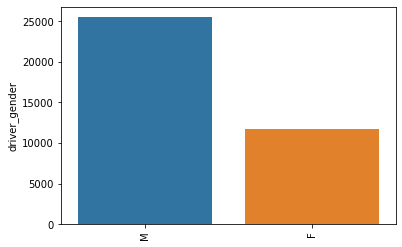

In [11]:
g=sns.barplot(speeding.index,speeding,data=police)
g.set_xticklabels(rotation=90,labels=speeding.index);

# Is it depenedent of gender whether he or she will be stopped at a stop?

In [12]:
police.groupby('driver_gender').search_conducted.sum()

driver_gender
F     366.0
M    2113.0
Name: search_conducted, dtype: float64

# What is the mean stop_duration

In [13]:
police.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [14]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   driver_gender       61474 non-null  object 
 3   driver_age_raw      61481 non-null  float64
 4   driver_age          61228 non-null  float64
 5   driver_race         61475 non-null  object 
 6   violation_raw       61475 non-null  object 
 7   violation           61475 non-null  object 
 8   search_conducted    65535 non-null  bool   
 9   search_type         2479 non-null   object 
 10  stop_outcome        61475 non-null  object 
 11  is_arrested         61475 non-null  object 
 12  stop_duration       61475 non-null  object 
 13  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(2), object(10)
memory usage: 6.1+ MB


In [15]:
police['stop_duration'].unique()

array(['0-15 Min', '16-30 Min', '30+ Min', nan, '2'], dtype=object)

In [16]:
police['stop_duration']=police['stop_duration'].map({'0-15 Min':7.5,'16-30 Min':24,'30+ Min':45})

In [17]:
police['stop_duration'].dropna(axis=0,inplace=True)

In [18]:
police['stop_duration'].mean()

12.187420698181345

# Compare age distributions for each violations

In [19]:
age_violation=police.groupby('violation').driver_age.describe()
age_violation

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


In [20]:
police['stop_outcome'].value_counts()

Citation            56564
Arrest Driver        2009
Warning              1889
N/D                   423
No Action             339
Arrest Passenger      251
Name: stop_outcome, dtype: int64

In [21]:
police['gender']=police['driver_gender'].map({'M':0,"F":1})
police.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,gender
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,0.0
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,0.0


In [22]:
police[police['stop_outcome']=='Arrest Driver'].driver_gender.value_counts()

M    1639
F     370
Name: driver_gender, dtype: int64

In [23]:
police['driver_race'].unique()

array(['White', 'Black', 'Asian', nan, 'Hispanic', 'Other'], dtype=object)

In [24]:
police['driver_race'].dropna(axis=0,inplace=True)

In [25]:
police[police['stop_outcome']=='Arrest Driver'].driver_race.value_counts()

White       1189
Black        464
Hispanic     328
Asian         27
Other          1
Name: driver_race, dtype: int64

In [26]:
police[police['stop_outcome']=='Citation'].driver_race.value_counts()

White       42439
Black        7345
Hispanic     5020
Asian        1569
Other         191
Name: driver_race, dtype: int64